<a href="https://colab.research.google.com/github/Arko06/Amazon-Sales-Data-Analysis/blob/main/Amazon%20Sales%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import files


uploaded = files.upload()

Saving Amazon Sales data.csv to Amazon Sales data.csv


# **ETL**

In [6]:
import io

Amazon_Sales_Data = pd.read_csv(io.BytesIO(uploaded['Amazon Sales data.csv']))
print(Amazon_Sales_Data)

                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Prio

In [ ]:
Amazon_Sales_Data.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
pd.isnull(Amazon_Sales_Data).sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
Amazon_Sales_Data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [ ]:
 Amazon_Sales_Data.shape
Amazon_Sales_Data.columns
Amazon_Sales_Data.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


# **Exploratory Data Analysis**

<ipython-input-33-f95958d516fd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=Amazon_Sales_Data, x='Region', y='Units Sold', ci=None, estimator=sum)


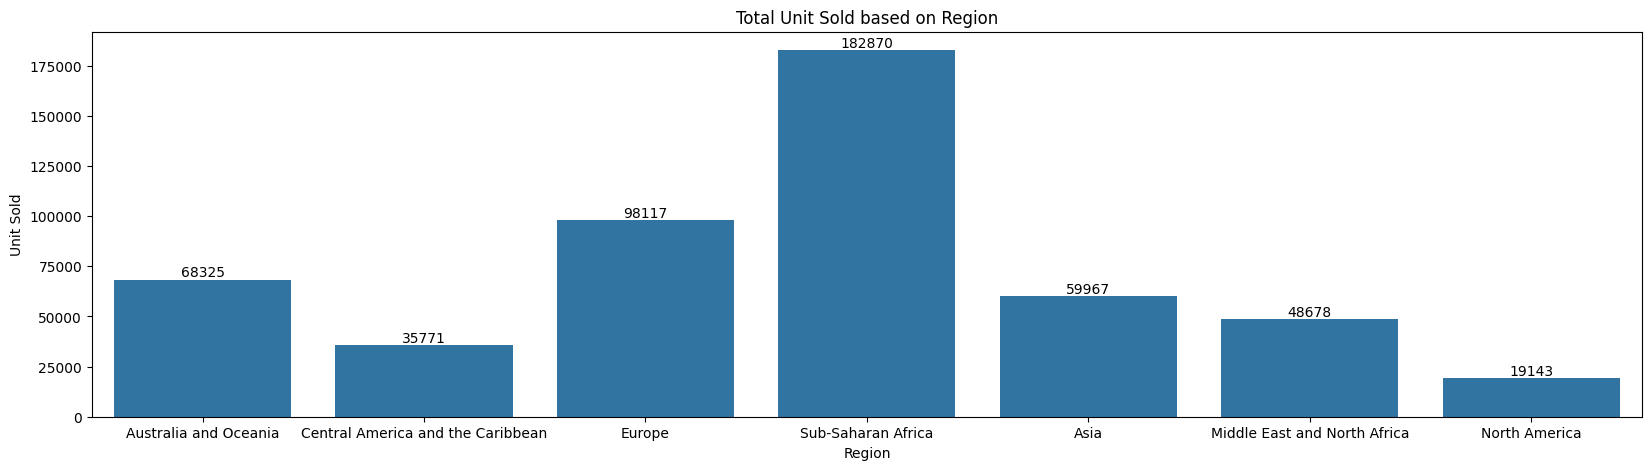

In [ ]:
# Units Sold based on Region
plt.figure(figsize=(20, 5))
barplot = sns.barplot(data=Amazon_Sales_Data, x='Region', y='Units Sold', ci=None, estimator=sum)

plt.title('Total Unit Sold based on Region')
plt.xlabel('Region')
plt.ylabel('Unit Sold')
for bars in barplot.containers: barplot.bar_label(bars)

**Sub-Saharan Africa Region has the highest unit sold(182870) and North America has the lowest unit sold(19143)**

---



In [ ]:
Amazon_Sales_Data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
#Amazon_Sales_Data: total revenue based on region

Total_Revenue_by_Region = Amazon_Sales_Data.groupby('Region')['Total Revenue'].sum() # Calculate the total revenue for each region
print(Total_Revenue_by_Region)

Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64


<ipython-input-36-7fd249701936>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data= Amazon_Sales_Data, x='Region', y='Total Revenue', ci=None, estimator=sum)


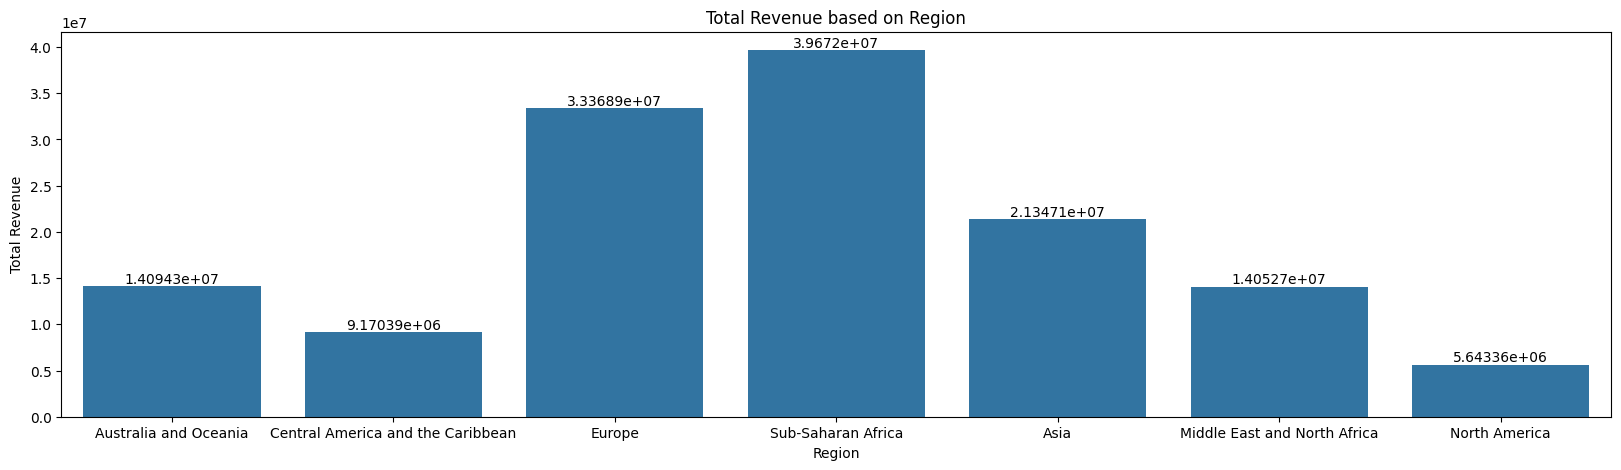

In [ ]:
plt.figure(figsize=(20, 5))
barplot = sns.barplot(data= Amazon_Sales_Data, x='Region', y='Total Revenue', ci=None, estimator=sum)

plt.title('Total Revenue based on Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
for bars in barplot.containers: barplot.bar_label(bars)

**Highest revenue came from Sub-Saharn Africa Region and lowest revenue came from North America**

In [7]:
#Amazon_Sales_Data: total revenue based on Country

Total_Revenue_by_Country = Amazon_Sales_Data.groupby('Country')['Total Revenue'].sum() # Calculate the total revenue for each Country
print(Total_Revenue_by_Country)

Country
Albania            247956.32
Angola            2798046.49
Australia         2489933.49
Austria           1244708.40
Azerbaijan        4478800.21
                     ...    
The Gambia        5449517.95
Turkmenistan      5822036.20
Tuvalu            2533654.00
United Kingdom     188452.14
Zambia             623289.30
Name: Total Revenue, Length: 76, dtype: float64


<ipython-input-15-e8293eece8d0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data= Amazon_Sales_Data, x='Country', y='Total Revenue', ci=None, estimator=sum)
<ipython-input-15-e8293eece8d0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)


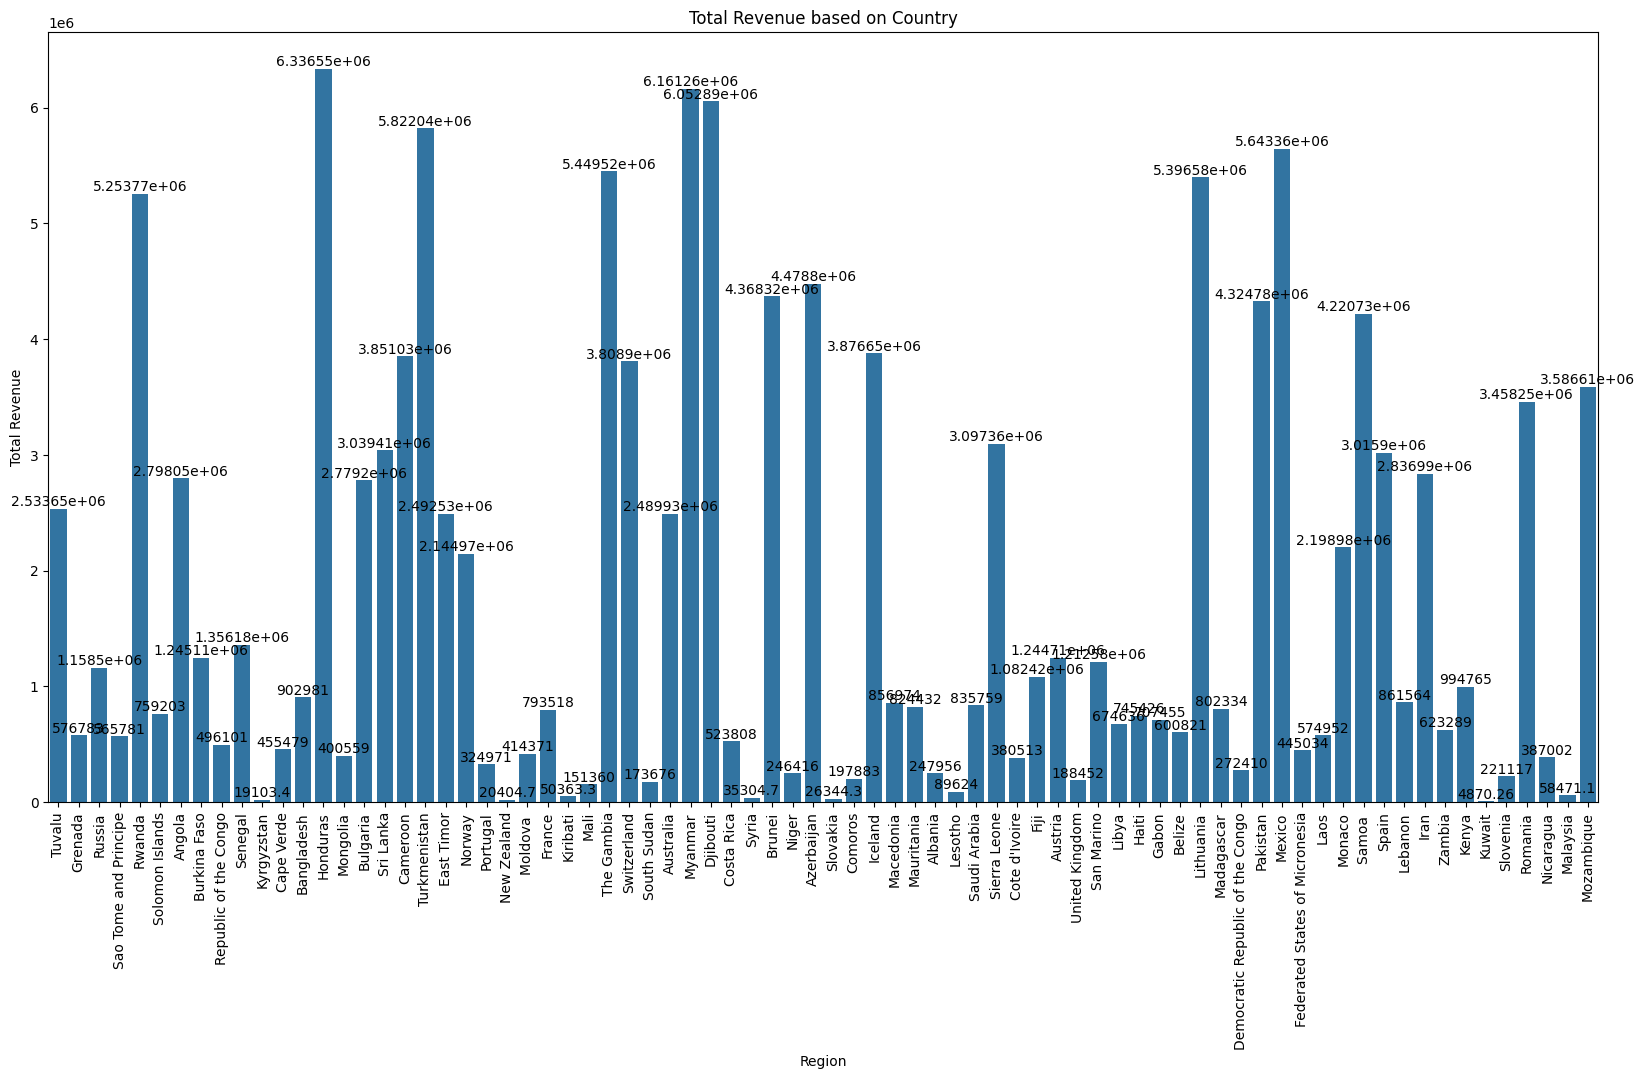

In [15]:
plt.figure(figsize=(20, 10))
barplot = sns.barplot(data= Amazon_Sales_Data, x='Country', y='Total Revenue', ci=None, estimator=sum)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

plt.title('Total Revenue based on Country')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
for bars in barplot.containers: barplot.bar_label(bars)

In [ ]:
Sales_channel = Amazon_Sales_Data.groupby(['Sales Channel'], as_index = False )['Total Revenue'].sum().sort_values(by = 'Total Revenue', ascending = False)
print(Sales_channel)

  Sales Channel  Total Revenue
0       Offline    79094809.20
1        Online    58253959.11


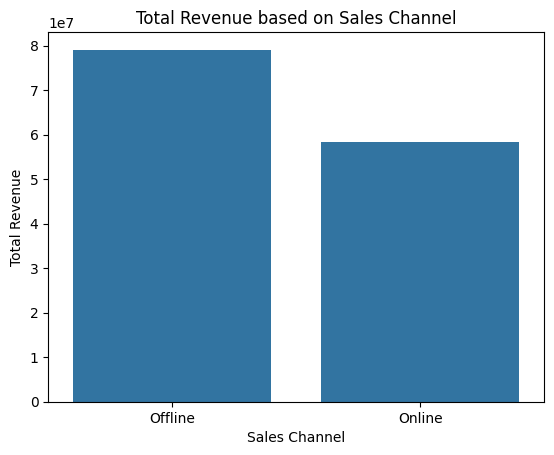

In [ ]:
#Barplot showing sales from different Channel
sns.barplot(x = 'Sales Channel', y = 'Total Revenue', data = Sales_channel)
plt.title('Total Revenue based on Sales Channel')
for bars in barplot.containers: barplot.bar_label(bars)

**More revenue came from Offline than Online**

In [ ]:
Item_type_revenue = Amazon_Sales_Data.groupby(['Item Type'], as_index = False )['Total Revenue'].sum().sort_values(by = 'Total Revenue', ascending = False)
print(Item_type_revenue)

          Item Type  Total Revenue
4         Cosmetics    36601509.60
8   Office Supplies    30585380.07
6         Household    29889712.29
0         Baby Food    10350327.60
3           Clothes     7787292.80
2            Cereal     5322898.90
7              Meat     4503675.75
9     Personal Care     3980904.84
11       Vegetables     3089057.06
1         Beverages     2690794.60
10           Snacks     2080733.46
5            Fruits      466481.34


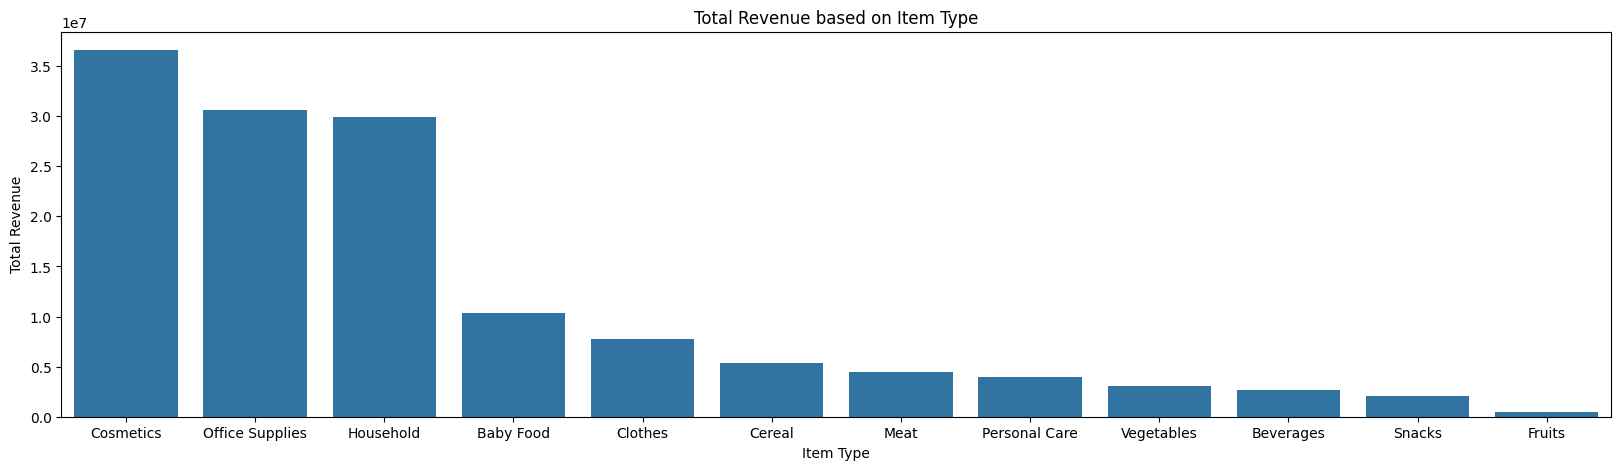

In [ ]:
#Total Revenue based on Item Type
plt.figure(figsize=(20, 5))
sns.barplot(x = 'Item Type', y = 'Total Revenue', data = Item_type_revenue)
plt.title('Total Revenue based on Item Type')
for bars in barplot.containers: barplot.bar_label(bars)

**Cosmetics generated the highest revenue followed by Office Supplies, whereas Fruits generated lowest revenue**

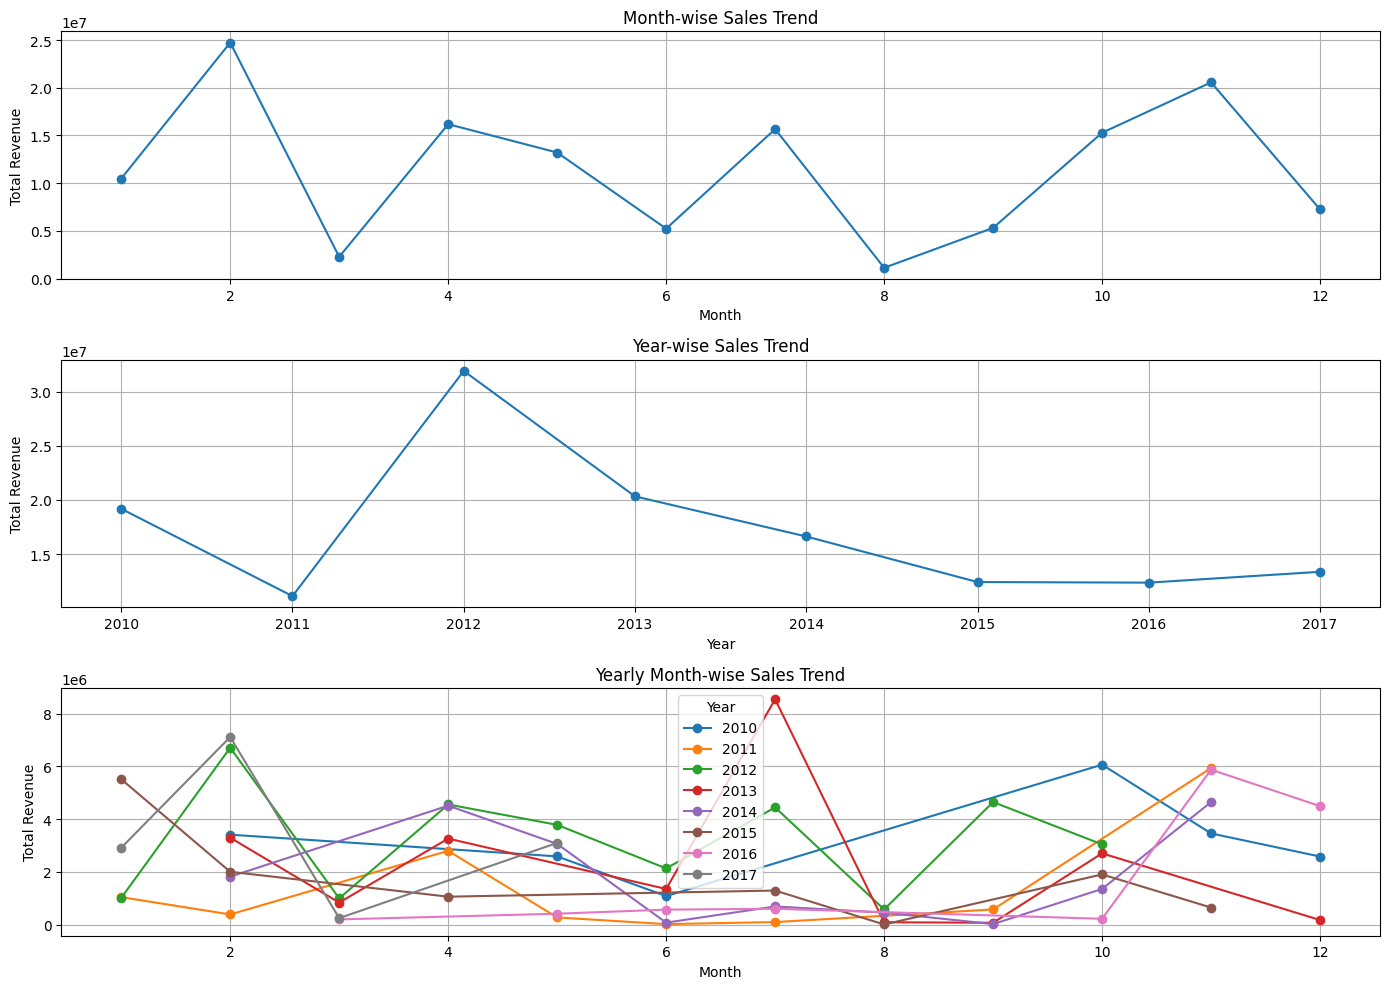

(    Order Month  Total Revenue
 0             1    10482467.12
 1             2    24740517.77
 2             3     2274823.87
 3             4    16187186.33
 4             5    13215739.99
 5             6     5230325.77
 6             7    15669518.50
 7             8     1128164.91
 8             9     5314762.56
 9            10    15287576.61
 10           11    20568222.76
 11           12     7249462.12,
    Order Year  Total Revenue
 0        2010    19186024.92
 1        2011    11129166.07
 2        2012    31898644.52
 3        2013    20330448.66
 4        2014    16630214.43
 5        2015    12427982.86
 6        2016    12372867.22
 7        2017    13373419.63,
     Order Year  Order Month  Total Revenue
 0         2010            2     3410661.12
 1         2010            5     2587973.26
 2         2010            6     1082418.40
 3         2010           10     6064933.75
 4         2010           11     3458252.00
 5         2010           12     2581786.39
 6  

In [ ]:
# Convert 'Order Date' and 'Ship Date' to datetime format
Amazon_Sales_Data['Order Date'] = pd.to_datetime(Amazon_Sales_Data['Order Date'], format='%m/%d/%Y')
Amazon_Sales_Data['Ship Date'] = pd.to_datetime(Amazon_Sales_Data['Ship Date'], format='%m/%d/%Y')

# Extract month and year from 'Order Date'
Amazon_Sales_Data['Order Month'] = Amazon_Sales_Data['Order Date'].dt.month
Amazon_Sales_Data['Order Year'] = Amazon_Sales_Data['Order Date'].dt.year

# Group by month and year, and calculate the sum of 'Total Revenue'
month_wise_trend = Amazon_Sales_Data.groupby('Order Month')['Total Revenue'].sum().reset_index()
year_wise_trend = Amazon_Sales_Data.groupby('Order Year')['Total Revenue'].sum().reset_index()
yearly_month_wise_trend = Amazon_Sales_Data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

# Plotting the sales trends
plt.figure(figsize=(14, 10))

# Month-wise trend
plt.subplot(3, 1, 1)
plt.plot(month_wise_trend['Order Month'], month_wise_trend['Total Revenue'], marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Year-wise trend
plt.subplot(3, 1, 2)
plt.plot(year_wise_trend['Order Year'], year_wise_trend['Total Revenue'], marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)

# Yearly Month-wise trend
plt.subplot(3, 1, 3)
for year in yearly_month_wise_trend['Order Year'].unique():
    yearly_data = yearly_month_wise_trend[yearly_month_wise_trend['Order Year'] == year]
    plt.plot(yearly_data['Order Month'], yearly_data['Total Revenue'], marker='o', label=str(year))
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.grid(True)

plt.tight_layout()
plt.show()

# Output the data for trends
month_wise_trend, year_wise_trend, yearly_month_wise_trend

# **Creating a linear regression model to establish a relation between units sold and total profit for each item type**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Group the data by Item Type
grouped_data = Amazon_Sales_Data.groupby('Item Type')

# Store results
results = {}

# Fit a linear regression model for each item type
for item_type, group in grouped_data:
    X = group[['Units Sold']]
    y = group['Total Profit']

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    # Store the results
    results[item_type] = {
        'model': model,
        'r2_score': r2,
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }
    results

In [ ]:
print(results)

{'Baby Food': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([95.86]), 'intercept': 0.0}, 'Beverages': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([15.66]), 'intercept': -2.9103830456733704e-11}, 'Cereal': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([88.59]), 'intercept': -1.1641532182693481e-10}, 'Clothes': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([73.44]), 'intercept': -5.820766091346741e-11}, 'Cosmetics': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([173.87]), 'intercept': -4.656612873077393e-10}, 'Fruits': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([2.41]), 'intercept': -1.8189894035458565e-12}, 'Household': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([165.73]), 'intercept': 1.1641532182693481e-10}, 'Meat': {'model': LinearRegression(), 'r2_score': 1.0, 'coefficients': array([57.2]), 'intercept': 2.32830643653

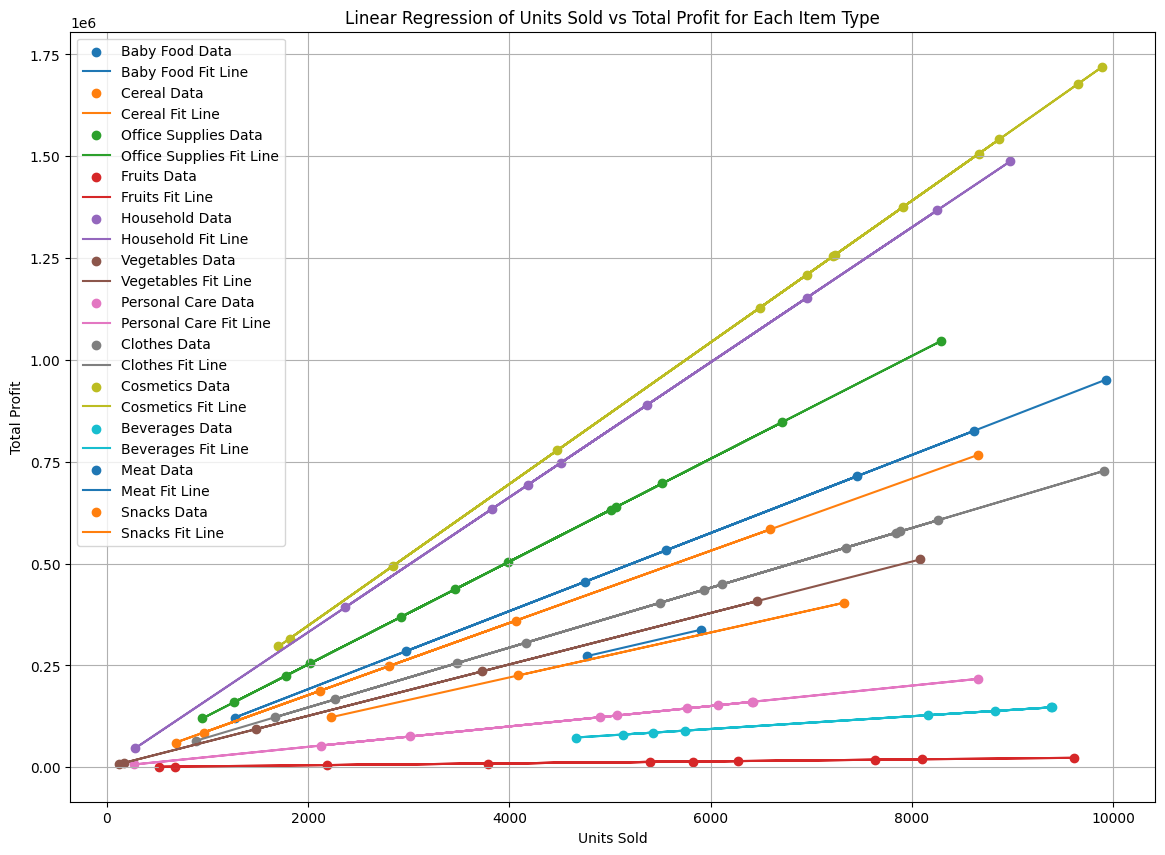

[('Baby Food', 95.86, 0.0),
 ('Cereal', 88.59000000000002, -1.1641532182693481e-10),
 ('Office Supplies', 126.24999999999997, 1.7462298274040222e-10),
 ('Fruits', 2.41, -1.8189894035458565e-12),
 ('Household', 165.73, 1.1641532182693481e-10),
 ('Vegetables', 63.12999999999999, 5.820766091346741e-11),
 ('Personal Care', 25.060000000000006, -4.3655745685100555e-11),
 ('Clothes', 73.44000000000001, -5.820766091346741e-11),
 ('Cosmetics', 173.87000000000006, -4.656612873077393e-10),
 ('Beverages', 15.660000000000004, -2.9103830456733704e-11),
 ('Meat', 57.19999999999996, 2.3283064365386963e-10),
 ('Snacks', 55.13999999999999, 2.9103830456733704e-11)]

In [ ]:
from sklearn.linear_model import LinearRegression

# Extract relevant columns
item_types = Amazon_Sales_Data['Item Type'].unique()
results = []

# Initialize the plot
plt.figure(figsize=(14, 10))

# Loop through each item type
for item in item_types:
    # Filter data for the current item type
    item_data = Amazon_Sales_Data[Amazon_Sales_Data['Item Type'] == item]

    # Extract the independent (Units Sold) and dependent (Total Profit) variables
    X = item_data['Units Sold'].values.reshape(-1, 1)
    y = item_data['Total Profit'].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Plot the data and the regression line
    plt.scatter(X, y, label=f'{item} Data')
    plt.plot(X, y_pred, label=f'{item} Fit Line')

    # Save the results
    results.append((item, model.coef_[0], model.intercept_))

# Customize the plot
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.title('Linear Regression of Units Sold vs Total Profit for Each Item Type')
plt.legend()
plt.grid(True)
plt.show()


**The linear regression analysis shows that for each item type, there is a positive relationship between units sold and total profit, with varying degrees of strength indicated by the slope coefficients.**